##  Sentiment Analysis with VADER

The reason I prefer **VADER** over **TextBlob** is:  
- **Optimized for short, informal text** like reviews, tweets, and comments.  
- **Handles negations, intensity modifiers, and punctuation emphasis** better.  
- **Provides a more granular sentiment score** with positive, neutral, and negative breakdowns.  
- **Recognizes emojis and slang**, making it more accurate for user-generated content.  

VADER is simply **better suited for analyzing Google Play Store reviews!**

In [1]:
import os
import sys

# Ensure scripts folder is in the path
module_path = os.path.abspath(os.path.join("..", "scripts"))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import the SentimentAnalyzer module
from sentiment_analyzer import SentimentAnalyzer


# Initialize the SentimentAnalyzer
analyzer = SentimentAnalyzer("../data/cleaned_reviews.csv")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\girma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\girma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\girma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\girma\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Apply sentiment analysis interactively
analyzer.apply_sentiment_analysis()

In [3]:
# Display sample results
analyzer.df[["review", "processed_review","sentiment_score", "sentiment_label"]].sample(10)

,review,processed_review,sentiment_score,sentiment_label
7587,All in One ✍️secure ✍️reliable ✍️convenient. D...,one digital banking game changer,0.0000,neutral
7830,ፍጥነቱ በጣም አሪፍ ነው! እና ቀለል ያለ ነው ! ነገር ግን ተጨማሪ ወደ...,ፍጥነቱ በጣም አሪፍ ነው እና ቀለል ያለ ነው ነገር ግን ተጨማሪ ወደ ቴሌ...,0.0000,neutral
3113,Commercial Ba...,commercial ba,0.0000,neutral
6491,Nice,nice,0.4215,positive
8226,Fast one,fast one,0.0000,neutral
7947,"this app, for me , is a waste of time. It does...",app waste time work ca even long really piss f...,-0.8297,negative
5854,"Nice app, I live abroad and I was managing tra...",nice app live abroad managing transaction usin...,0.7003,positive
6208,Nice,nice,0.4215,positive
4185,It says none avaliable and stopped,say none avaliable stopped,0.1695,positive
4985,It is easiest app i ever seen 🤷‍♂️🤷‍♂️,easiest app ever seen,0.4215,positive


In [4]:
# save the results
analyzer.save_results("../data/sentiment_reviews.csv")

✅ Sentiment analysis completed and saved to ../data/sentiment_reviews.csv!


### Sentiment Distiribution 

In [29]:
# reload the data 
df = pd.read_csv('../data/sentiment_reviews.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8984 entries, 0 to 8983
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bank              8984 non-null   object 
 1   review            8984 non-null   object 
 2   rating            8984 non-null   int64  
 3   date              8984 non-null   object 
 4   source            8984 non-null   object 
 5   processed_review  8794 non-null   object 
 6   sentiment_score   8984 non-null   float64
 7   sentiment_label   8984 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 561.6+ KB


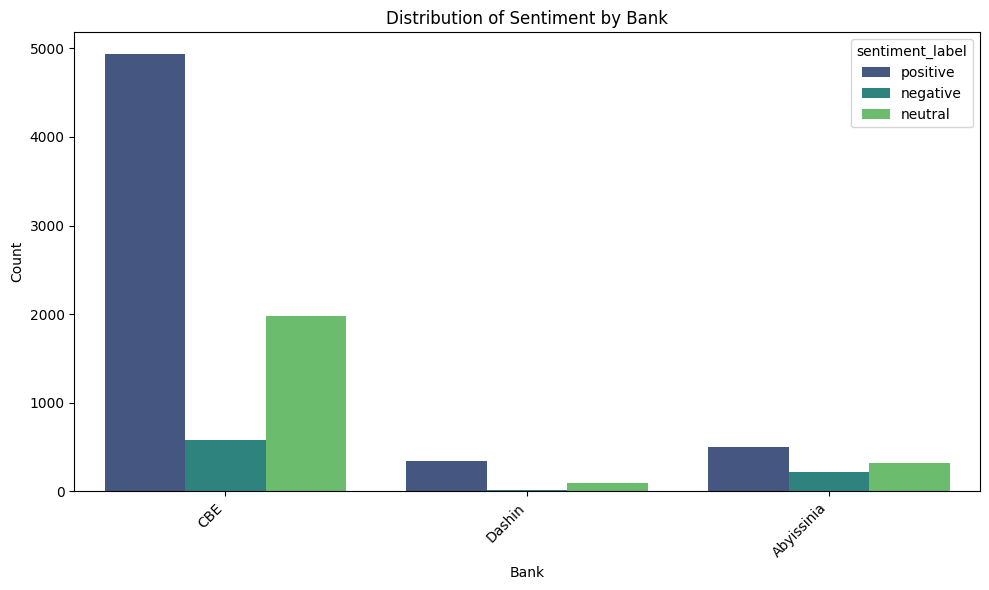

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot sentiment distirbution by bank
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='bank', hue='sentiment_label', palette='viridis')
plt.title('Distribution of Sentiment by Bank')
plt.xlabel('Bank')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if bank names are long
plt.tight_layout()
plt.show()

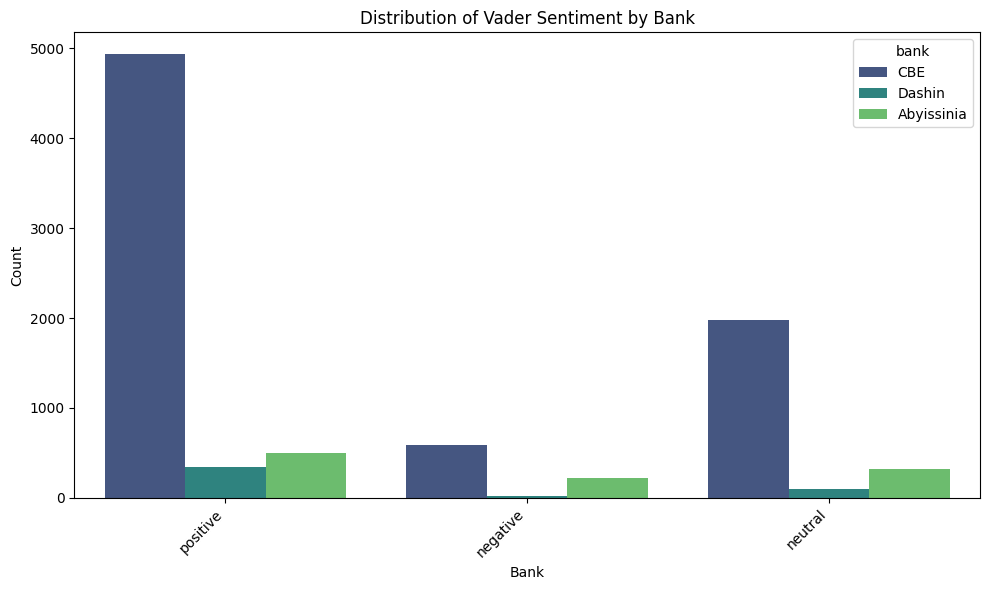

In [32]:
# Plot sentiment level distibution across the  banks

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sentiment_label', hue='bank', palette='viridis')
plt.title('Distribution of Vader Sentiment by Bank')
plt.xlabel('Bank')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if bank names are long
plt.tight_layout()
plt.show()

### **Keyword Extraction for Banking App Reviews**  
Identify key terms in **positive vs. negative user reviews** to uncover **satisfaction drivers and pain points** in banking apps. By extracting significant words and phrases, we can **highlight common frustrations** (e.g., login issues, slow transactions) and **features users appreciate** (e.g., intuitive UI, fast transfers). This helps **banks optimize their services** based on real user feedback.

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import re


#load the sentiment_review.csv data
df = pd.read_csv('../data/sentiment_reviews.csv') #Alternatively df = analizer.df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8984 entries, 0 to 8983
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bank              8984 non-null   object 
 1   review            8984 non-null   object 
 2   rating            8984 non-null   int64  
 3   date              8984 non-null   object 
 4   source            8984 non-null   object 
 5   processed_review  8794 non-null   object 
 6   sentiment_score   8984 non-null   float64
 7   sentiment_label   8984 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 561.6+ KB


In [ ]:
# Overall Sentiment Reviews
positive_reviews = df[df['sentiment_label'] == 'positive']['processed_review']
negative_reviews = df[df['sentiment_label'] == 'negative']['processed_review']
neutral_reviews = df[df['sentiment_label'] == 'neutral']['processed_review']

# Reviews per Bank and Sentiment
unique_banks = df['bank'].unique()

positive_reviews_by_bank = {}
negative_reviews_by_bank = {}
neutral_reviews_by_bank = {}

for bank_name in unique_banks:
    positive_reviews_by_bank[bank_name] = df[(df['bank'] == bank_name) & (df['sentiment_label'] == 'positive')]['processed_review']
    negative_reviews_by_bank[bank_name] = df[(df['bank'] == bank_name) & (df['sentiment_label'] == 'negative')]['processed_review']
    neutral_reviews_by_bank[bank_name] = df[(df['bank'] == bank_name) & (df['sentiment_label'] == 'neutral')]['processed_review']


def extract_top_keywords_tfidf(text_series, num_keywords=10, ngram_range=(1, 1)):
    """
    Extracts top TF-IDF keywords from a Series of text reviews.

    Args:
        text_series (pd.Series): A Series containing processed review texts.
        num_keywords (int): The number of top keywords to extract.
        ngram_range (tuple): The lower and upper boundary of the range of n-values
                             for different word n-grams or char n-grams to be extracted.

    Returns:
        list: A list of tuples (keyword, score).
    """
    if text_series.empty or text_series.isnull().all(): # Handle empty or all-NaN series
        return []

    tfidf_vectorizer = TfidfVectorizer(
        stop_words='english',
        min_df=1, # Lower min_df for smaller datasets, adjust as needed
        max_df=0.9, # Adjust max_df based on corpus size
        ngram_range=ngram_range
    )

    tfidf_matrix = tfidf_vectorizer.fit_transform(text_series.dropna())
    feature_names = tfidf_vectorizer.get_feature_names_out()
    scores = tfidf_matrix.sum(axis=0)

    word_scores = [(feature_names[i], scores[0, i]) for i in range(len(feature_names))]
    sorted_words = sorted(word_scores, key=lambda x: x[1], reverse=True)

    return sorted_words[:num_keywords]


def plot_keywords(keywords_data, title, num_keywords=10):
    """
    Plots the top keywords and their TF-IDF scores as a horizontal bar chart.

    Args:
        keywords_data (list): A list of tuples (keyword, score).
        title (str): The title of the plot.
        num_keywords (int): The number of keywords to display (should match
                              what was extracted).
    """
    if not keywords_data:
        print(f"No keywords to plot for: {title}")
        return

    # Create a DataFrame for easy plotting
    df_plot = pd.DataFrame(keywords_data, columns=['Keyword', 'TFIDF Score'])

    plt.figure(figsize=(10, 6))
    sns.barplot(x='TFIDF Score', y='Keyword', data=df_plot.head(num_keywords), palette='viridis')
    plt.title(title, fontsize=16)
    plt.xlabel('Aggregated TF-IDF Score', fontsize=12)
    plt.ylabel('Keyword', fontsize=12)
    plt.tight_layout()
    plt.show()


# Word Cloud Visualization Function 

def extract_keywords_for_wordcloud(text_series, ngram_range=(1, 1)):
    """
    Extracts TF-IDF keywords and their scores, formatted for WordCloud.

    Args:
        text_series (pd.Series): A Series containing processed review texts.
        ngram_range (tuple): The lower and upper boundary of the range of n-values.

    Returns:
        dict: A dictionary where keys are keywords and values are their TF-IDF scores.
    """
    if text_series.empty or text_series.isnull().all():
        return {}

    tfidf_vectorizer = TfidfVectorizer(
        stop_words='english',
        min_df=1, # Adjust based on dataset size; 1 for smaller groups
        max_df=0.9, # Adjust based on corpus size
        ngram_range=ngram_range
    )

    tfidf_matrix = tfidf_vectorizer.fit_transform(text_series.dropna())
    feature_names = tfidf_vectorizer.get_feature_names_out()
    scores = tfidf_matrix.sum(axis=0)

    # Create a dictionary of word:score for the WordCloud
    word_scores_dict = {feature_names[i]: scores[0, i] for i in range(len(feature_names))}
    return word_scores_dict

def plot_wordcloud(word_scores_dict, title):
    """
    Generates and displays a word cloud from a dictionary of words and their scores.

    Args:
        word_scores_dict (dict): A dictionary where keys are words and values are their scores.
        title (str): The title of the word cloud plot.
    """
    if not word_scores_dict:
        print(f"No words to plot for word cloud: {title}")
        return

    # Create a WordCloud object
    # You can customize parameters like background_color, width, height, collocations=False to avoid bi-grams as single words
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        collocations=False, # Set to False if you don't want phrases like "New York" to appear as "New York"
        min_font_size=10
    ).generate_from_frequencies(word_scores_dict) # Generate from our word-score dictionary

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=18)
    plt.axis('off') # Hide axes
    plt.tight_layout()
    plt.show()


--- Overall Keyword Visualization ---


C:\Users\girma\AppData\Local\Temp\ipykernel_22200\4119239036.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TFIDF Score', y='Keyword', data=df_plot.head(num_keywords), palette='viridis')


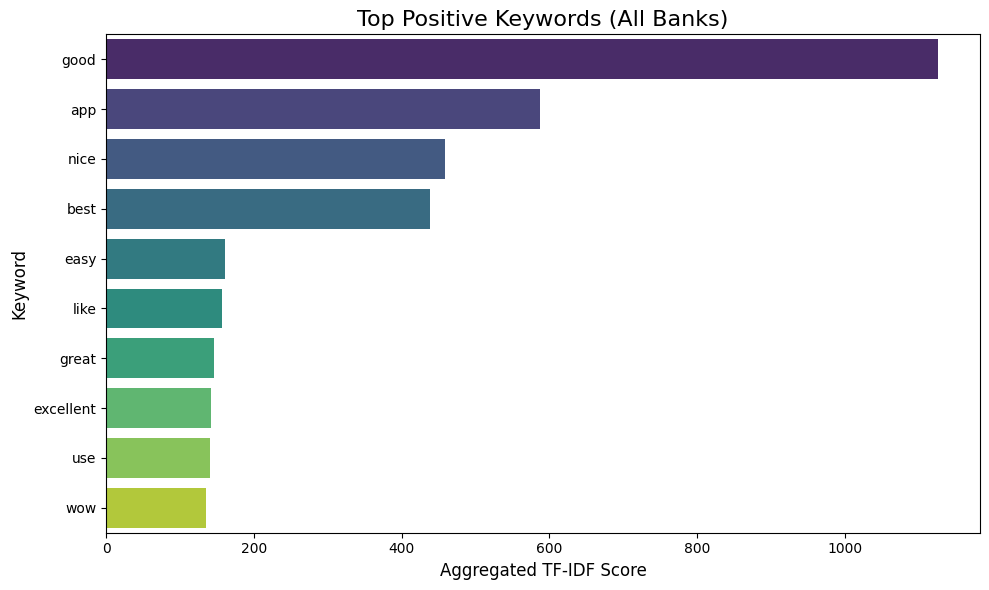

C:\Users\girma\AppData\Local\Temp\ipykernel_22200\4119239036.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TFIDF Score', y='Keyword', data=df_plot.head(num_keywords), palette='viridis')


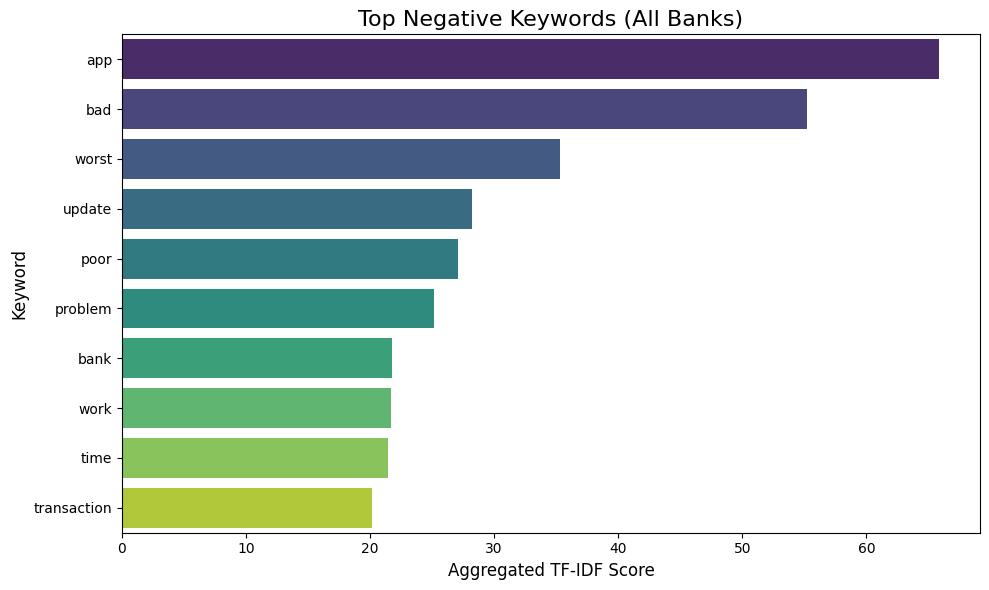

In [14]:
print("--- Overall Keyword Visualization ---")
# Keywords for all positive reviews
top_positive_keywords = extract_top_keywords_tfidf(positive_reviews)
plot_keywords(top_positive_keywords, "Top Positive Keywords (All Banks)")

# Keywords for all negative reviews
top_negative_keywords = extract_top_keywords_tfidf(negative_reviews)
plot_keywords(top_negative_keywords, "Top Negative Keywords (All Banks)")


--- Keyword Visualization Per Bank ---


C:\Users\girma\AppData\Local\Temp\ipykernel_22200\4119239036.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TFIDF Score', y='Keyword', data=df_plot.head(num_keywords), palette='viridis')


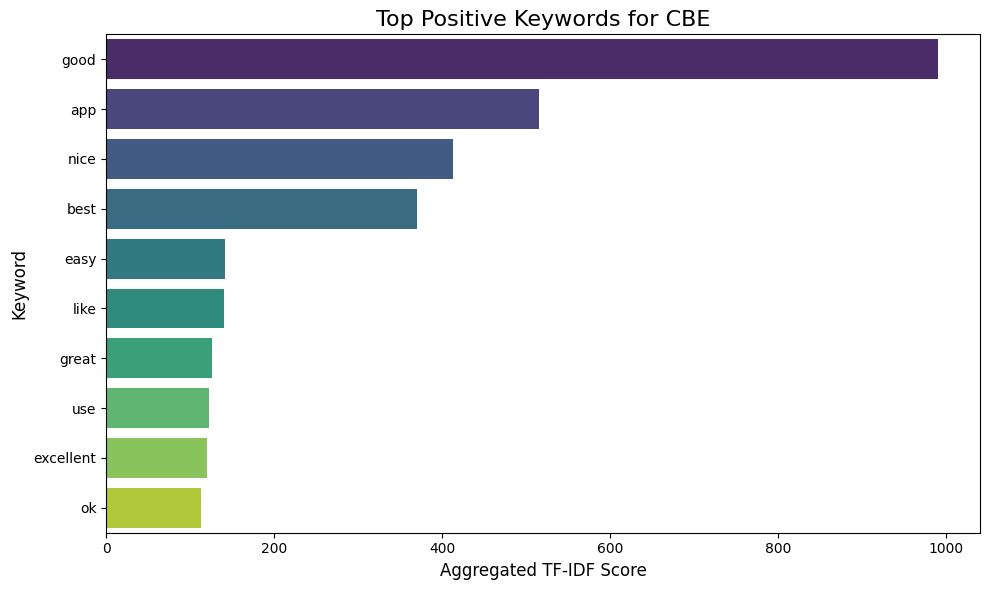

C:\Users\girma\AppData\Local\Temp\ipykernel_22200\4119239036.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TFIDF Score', y='Keyword', data=df_plot.head(num_keywords), palette='viridis')


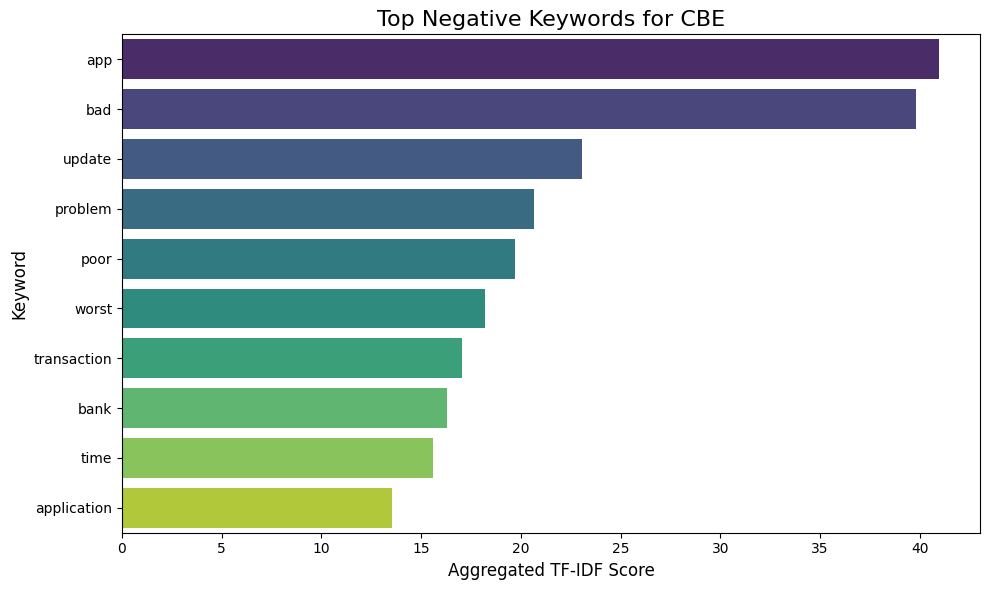

C:\Users\girma\AppData\Local\Temp\ipykernel_22200\4119239036.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TFIDF Score', y='Keyword', data=df_plot.head(num_keywords), palette='viridis')


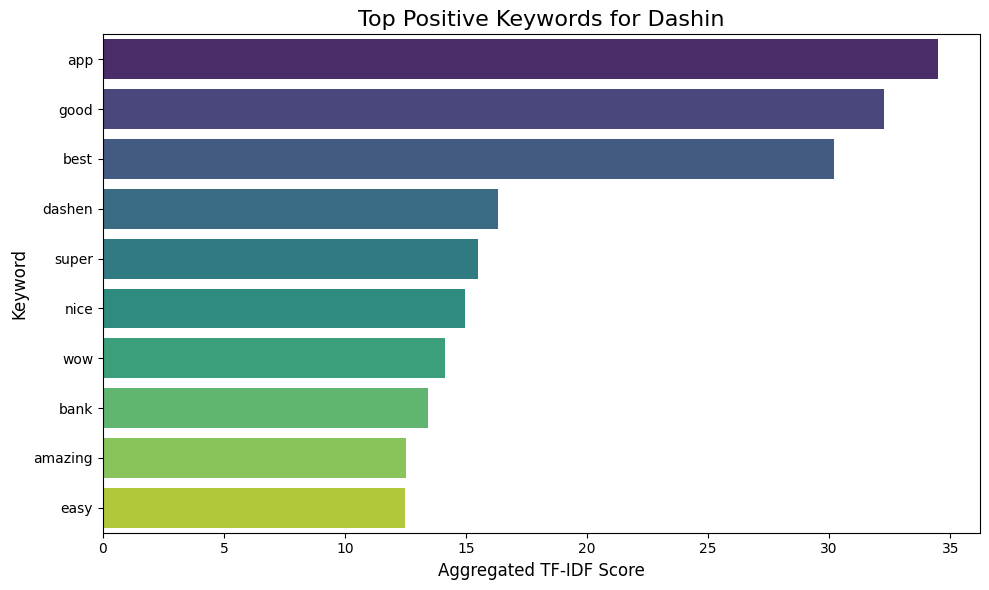

C:\Users\girma\AppData\Local\Temp\ipykernel_22200\4119239036.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TFIDF Score', y='Keyword', data=df_plot.head(num_keywords), palette='viridis')


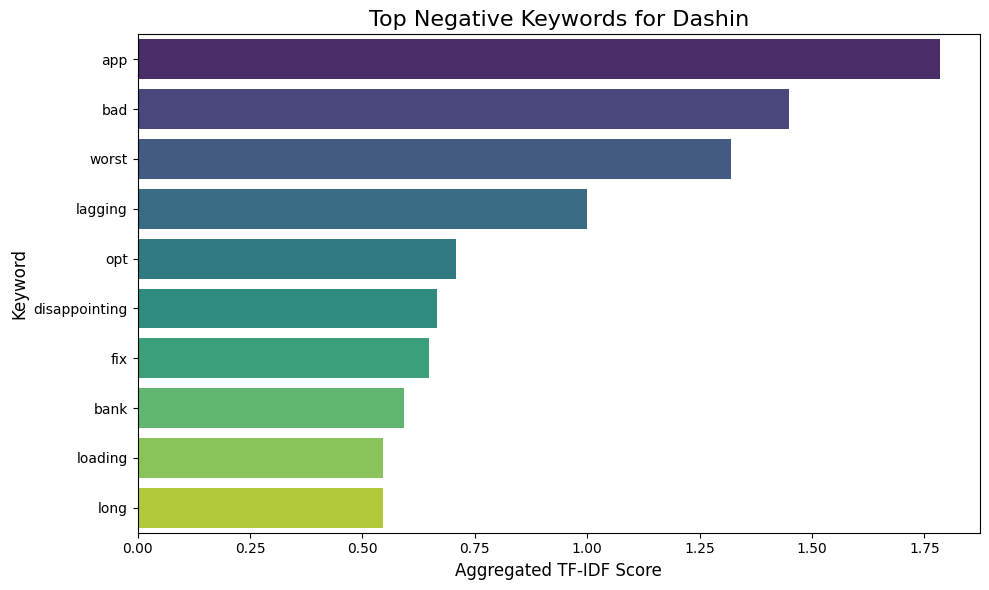

C:\Users\girma\AppData\Local\Temp\ipykernel_22200\4119239036.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TFIDF Score', y='Keyword', data=df_plot.head(num_keywords), palette='viridis')


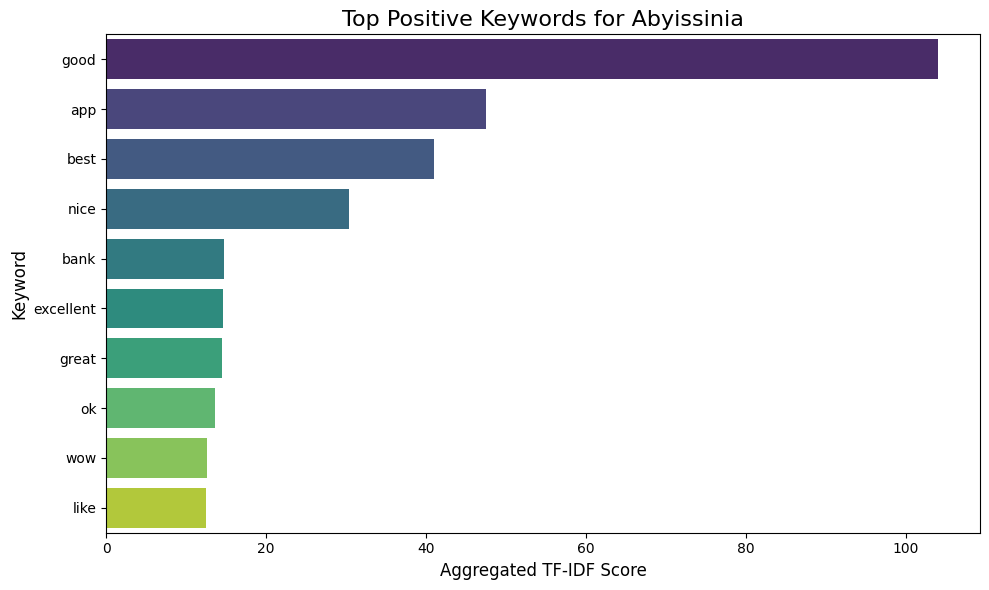

C:\Users\girma\AppData\Local\Temp\ipykernel_22200\4119239036.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TFIDF Score', y='Keyword', data=df_plot.head(num_keywords), palette='viridis')


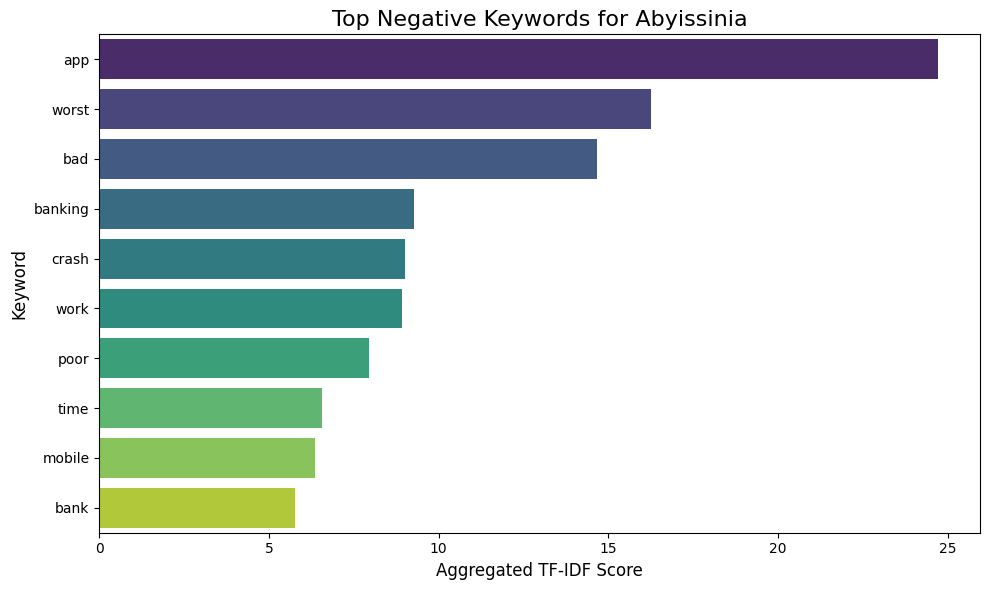

In [15]:
print("\n--- Keyword Visualization Per Bank ---")
for bank_name in unique_banks:
    # Positive reviews for the current bank
    bank_positive_reviews = positive_reviews_by_bank[bank_name]
    top_positive_keywords_bank = extract_top_keywords_tfidf(bank_positive_reviews)
    plot_keywords(top_positive_keywords_bank, f"Top Positive Keywords for {bank_name}")

    # Negative reviews for the current bank
    bank_negative_reviews = negative_reviews_by_bank[bank_name]
    top_negative_keywords_bank = extract_top_keywords_tfidf(bank_negative_reviews)
    plot_keywords(top_negative_keywords_bank, f"Top Negative Keywords for {bank_name}")

--- Overall Keyword Word Clouds ---


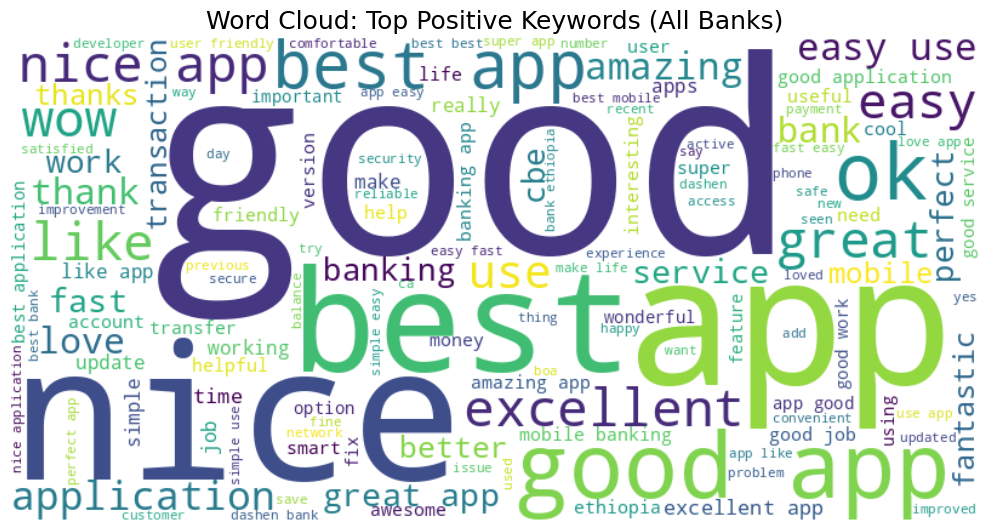

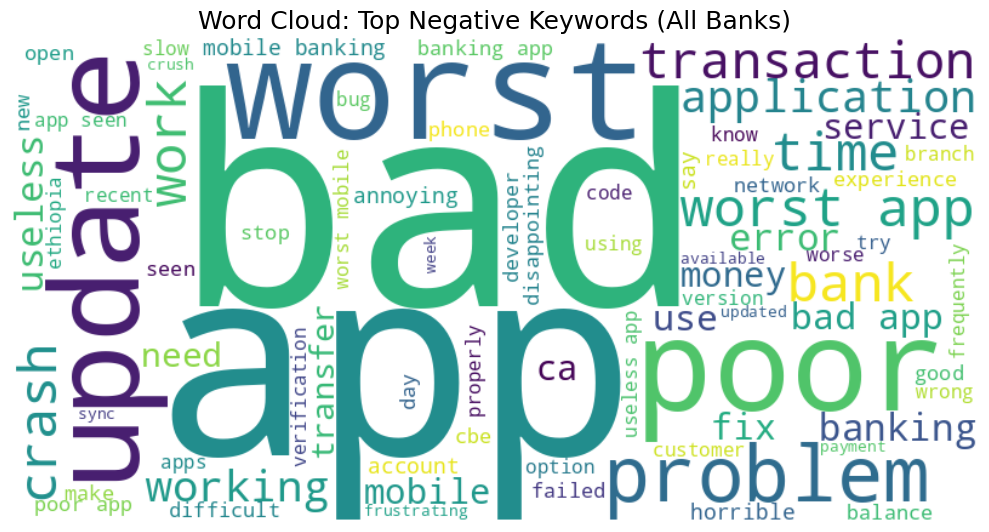

In [26]:
#4. Generate and Visualize Word Clouds ---

print("--- Overall Keyword Word Clouds ---")
# Word Cloud for all positive reviews
positive_wc_data = extract_keywords_for_wordcloud(positive_reviews, ngram_range=(1,2)) # Use (1,2) for bigrams too!
plot_wordcloud(positive_wc_data, "Word Cloud: Top Positive Keywords (All Banks)")

# Word Cloud for all negative reviews
negative_wc_data = extract_keywords_for_wordcloud(negative_reviews, ngram_range=(1,2))
plot_wordcloud(negative_wc_data, "Word Cloud: Top Negative Keywords (All Banks)")



--- Keyword Word Clouds Per Bank ---

--- CBE ---


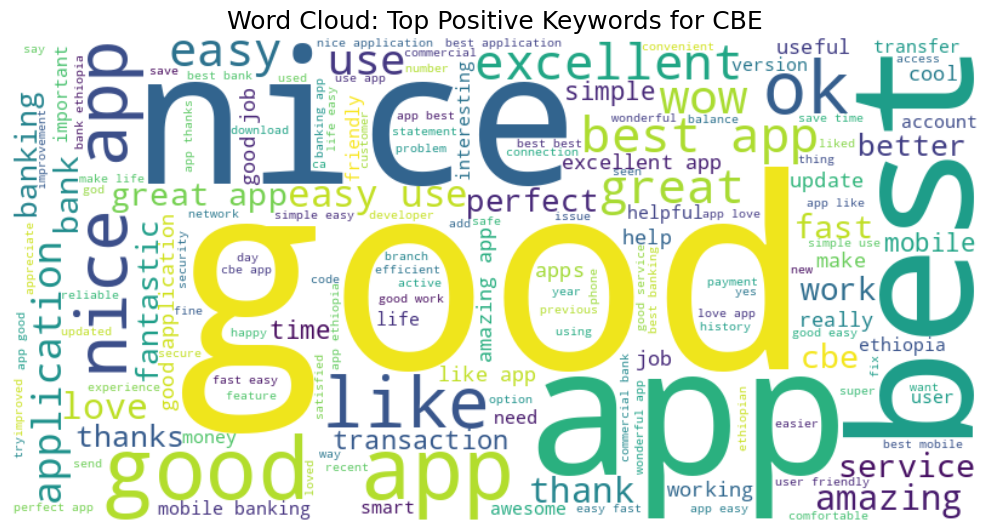

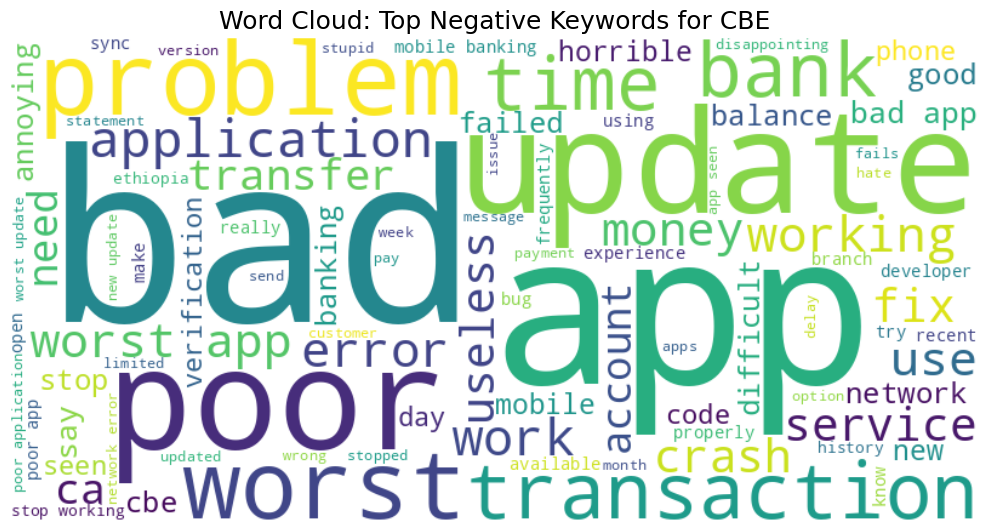


--- Dashin ---


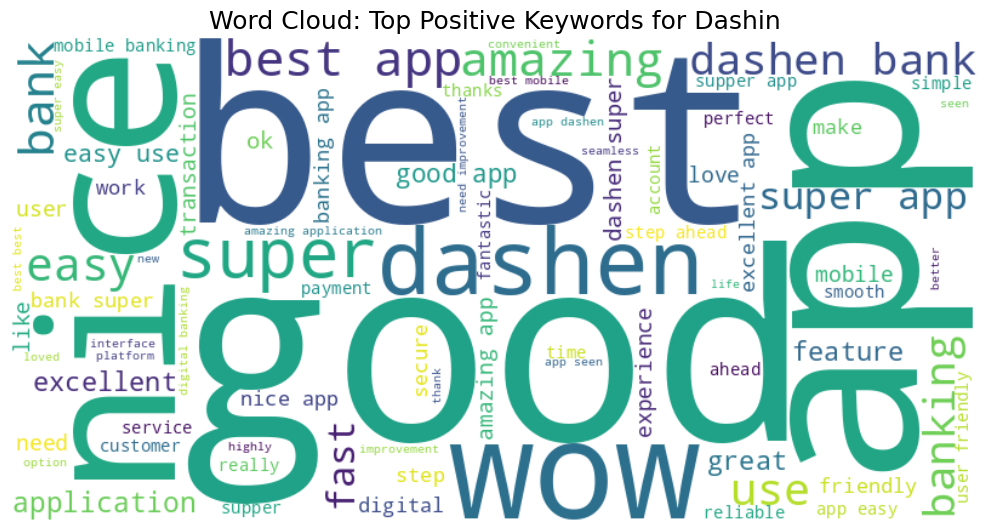

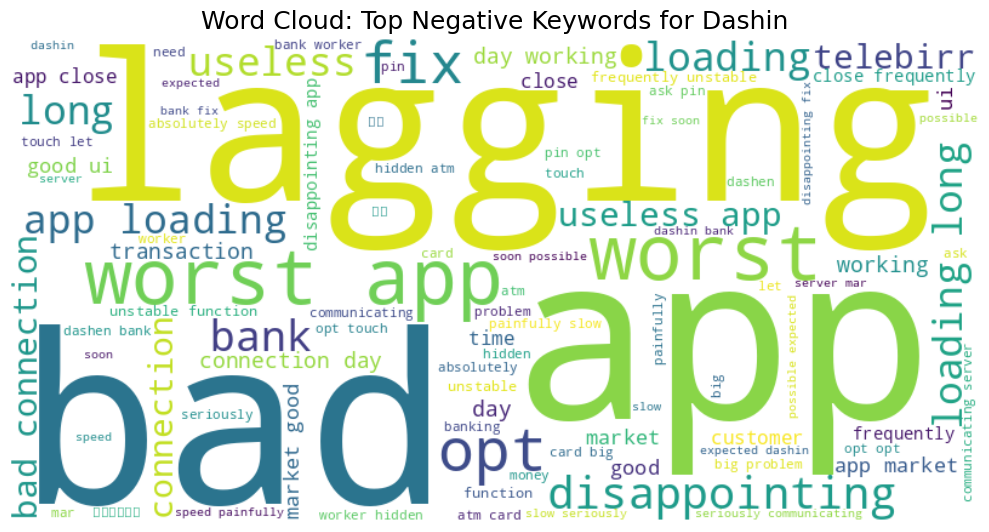


--- Abyissinia ---


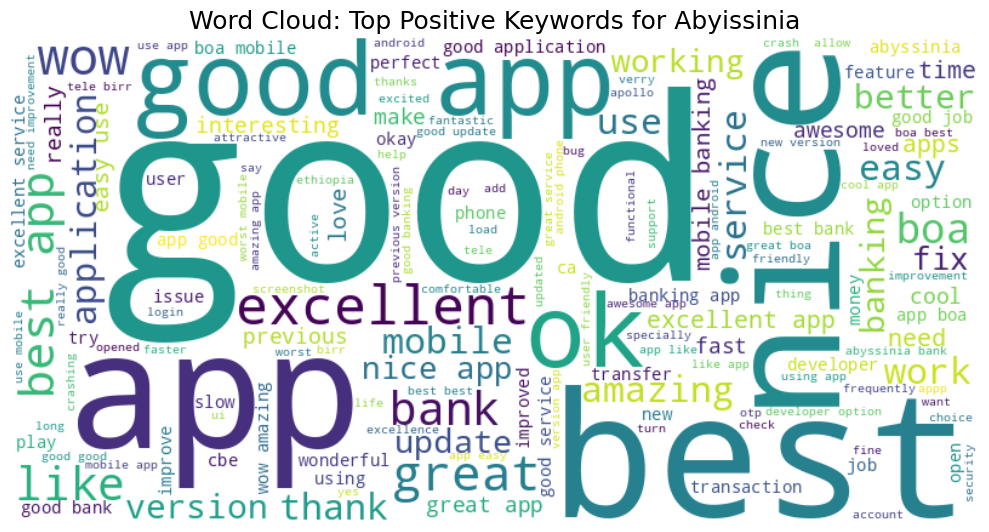

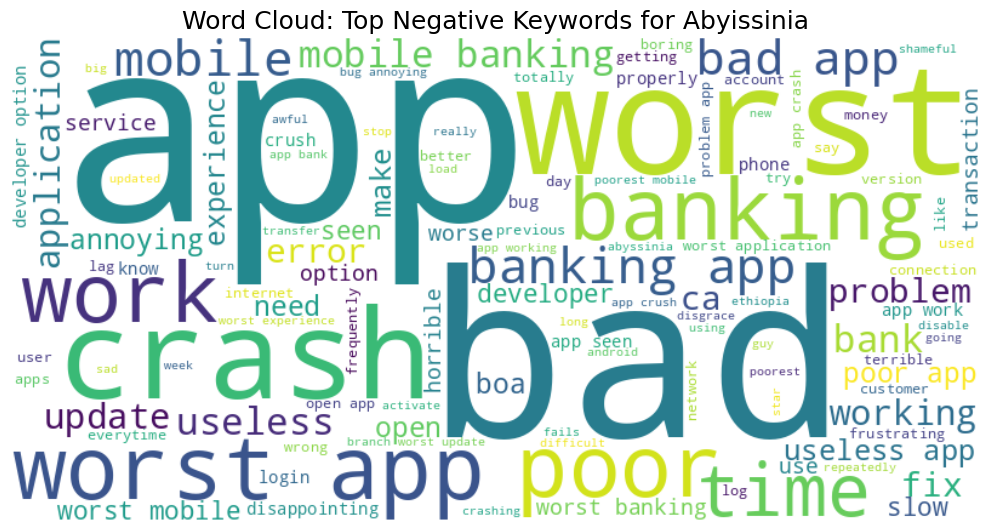

In [27]:
print("\n--- Keyword Word Clouds Per Bank ---")
for bank_name in unique_banks:
    print(f"\n--- {bank_name} ---")

    # Positive reviews for the current bank
    bank_positive_reviews = positive_reviews_by_bank[bank_name]
    positive_wc_bank_data = extract_keywords_for_wordcloud(bank_positive_reviews, ngram_range=(1,2))
    plot_wordcloud(positive_wc_bank_data, f"Word Cloud: Top Positive Keywords for {bank_name}")

    # Negative reviews for the current bank
    bank_negative_reviews = negative_reviews_by_bank[bank_name]
    negative_wc_bank_data = extract_keywords_for_wordcloud(bank_negative_reviews, ngram_range=(1,2))
    plot_wordcloud(negative_wc_bank_data, f"Word Cloud: Top Negative Keywords for {bank_name}")

### **Overall Keyword Interpretation**

**Top Positive Keywords (All Apps):**
* **'good', 'nice', 'best', 'easy', 'great', 'excellent', 'wow'**: These are strong positive descriptors, indicating general satisfaction, ease of use, and high quality.
* **'app', 'use', 'like'**: These words highlight that users are pleased with the application itself and how they interact with it.

*Interpretation:* Across all three banks, users are generally happy with the **overall quality** and **usability** of their respective mobile banking applications. The presence of 'wow' suggests some users are very impressed.

**Top Negative Keywords (All Apps):**
* **'app', 'bad', 'worst', 'poor'**: These are direct negative sentiments, indicating dissatisfaction with the application's performance or quality.
* **'update', 'problem', 'work', 'transaction'**: These are often associated with functional issues. 'Update' suggests problems encountered after new versions, 'problem' indicates general malfunctions, 'work' implies the app isn't functioning as expected, and 'transaction' points to issues with core banking operations.
* **'time', 'bank'**: 'Time' could refer to slow performance, long processing times, or wasted time. 'Bank' might be mentioned in a negative context related to the institution's service delivery via the app.

*Interpretation:* The common complaints across all apps revolve around **performance issues** (slow, crashing), **problems with updates**, and difficulties with core **transactional functionalities**.

---

### **Keyword Interpretation Per Bank**

---

### **CBE**

**Top Positive Keywords:**
* **'good', 'app', 'nice', 'best', 'easy', 'like', 'use', 'great', 'excellent', 'ok'**: This list is very similar to the overall positive keywords, suggesting that CBE's positive feedback aligns with general industry satisfaction. 'Ok' is a mild positive, indicating acceptance rather than strong delight, but still a positive.

*Interpretation:* CBE's users generally find their app **good, easy to use, and functional**. The positive feedback is quite generic, focusing on overall user experience.

**Top Negative Keywords:**
* **'app', 'bad', 'update', 'problem', 'poor', 'transaction', 'bank', 'time', 'worst', 'work'**: Again, this closely mirrors the overall negative keywords. The prominence of 'update', 'problem', 'transaction', and 'work' suggests that CBE specifically faces challenges with **app updates causing issues**, general **malfunctions**, and **problems with banking transactions**. 'Time' implies **slowness or delays**.

*Interpretation:* CBE's negative feedback heavily emphasizes **technical performance issues**, especially around **updates** and **transaction reliability**.

---

### **Dashin**

**Top Positive Keywords:**
* **'app', 'good', 'best', 'dashen', 'super', 'bank', 'use', 'amazing', 'nice', 'easy'**: Very strong positive terms like 'super' and 'amazing' indicate a highly satisfied user base for Dashin. The explicit mention of 'dashen' shows a strong brand connection within positive feedback.

*Interpretation:* Dashin appears to have a **highly positive and enthusiastic user base**. Their app is perceived as **excellent, easy to use**, and a strong reflection of the 'Dashen' brand.

**Top Negative Keywords:**
* **'app'**: This is a very interesting and somewhat ambiguous result. If 'app' is the *only* top negative keyword, it suggests a few possibilities:
    1.  **Low Volume of Negative Reviews**: Dashin might have very few negative reviews, so the TF-IDF didn't find other significantly discriminative negative terms. This is a positive sign.
    2.  **Generic Dissatisfaction**: If there are negative reviews, they might be extremely generic, simply stating "app is bad" without specifying *why*.
    3.  **Data Quality/Preprocessing**: It's worth double-checking if the negative reviews for Dashin are very short or if there was an issue with preprocessing that filtered out more specific terms.

*Interpretation:* This result is a bit of an outlier. If the volume of negative reviews is substantial, it points to a very **generic dissatisfaction** with the app, or that complaints are too diverse to form strong keyword clusters. However, if the volume of negative reviews is low, it indicates **Dashin is doing well** in avoiding common pitfalls that lead to specific negative feedback.

---

### **Abyissinia**

**Top Positive Keywords:**
* **'good', 'app', 'best', 'nice', 'bank', 'great', 'like', 'ok', 'excellent', 'boa'**: Similar to CBE, Abyissinia's positive feedback is general, praising the app's overall quality and usefulness. The inclusion of 'boa' (likely referring to Bank of Abyssinia) again indicates brand recognition in positive contexts.

*Interpretation:* Abyissinia's users generally have a **positive sentiment** towards their app, appreciating its **overall quality and functionality**.

**Top Negative Keywords:**
* **'app', 'worst', 'bad', 'work', 'banking', 'crash', 'poor', 'time', 'bank', 'mobile'**: This list highlights significant pain points. 'Crash' is a critical technical issue. 'Work' and 'mobile' further emphasize functionality problems specific to the mobile application. 'Banking' might imply issues with the core banking services delivered through the app.

*Interpretation:* Abyissinia appears to be facing more severe **technical stability issues**, specifically **crashes**, along with general **poor performance** and **frustrations with mobile banking functionality**. Similar to CBE, 'time' suggests **slowness**.

---

### **Summary of Key Takeaways**

* **Common Strengths**: All banks have apps that are generally perceived as **good, easy to use, and effective**.
* **Common Weaknesses**: **Performance issues** (slowness, not working), **problems with updates**, and **transactional difficulties** are universal pain points.
* **Dashin's Anomaly**: Dashin stands out with very strong positive keywords and a notably generic or absent negative keyword list, which warrants further investigation into the volume and nature of its negative reviews. If there are few, it's great!
* **CBE's Update/Transaction Focus**: CBE seems to have specific issues related to **updates breaking functionality** and **transaction reliability**.
* **Abyissinia's Crashing Issues**: Abyissinia has a notable problem with the app **crashing**, which is a severe user experience issue.

These interpretations provide a solid foundation for understanding customer feedback. You can now use these insights to inform product development, customer support, and marketing strategies for each bank.

Do these interpretations align with your expectations or any other information you have about these banks and their apps?